In [116]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


sw = set(nltk.corpus.stopwords.words('english'))
aiw = nltk.corpus.gutenberg.sents("carroll-alice.txt")

['Alice Adventures Wonderland Lewis Carroll 1865', 'CHAPTER', 'Rabbit Hole', 'Alice beginning get tired sitting sister bank nothing twice peeped book sister reading pictures conversations use book thought Alice without pictures conversation', 'considering mind well could hot day made feel sleepy stupid whether pleasure making daisy chain would worth trouble getting picking daisies suddenly White Rabbit pink eyes ran close', 'nothing remarkable Alice think much way hear Rabbit say Oh dear', 'Oh dear', 'shall late', 'thought afterwards occurred ought wondered time seemed quite natural Rabbit actually TOOK WATCH WAISTCOAT POCKET looked hurried Alice started feet flashed across mind never seen rabbit either waistcoat pocket watch take burning curiosity ran across field fortunately time see pop large rabbit hole hedge', 'another moment went Alice never considering world get', 'rabbit hole went straight like tunnel way dipped suddenly suddenly Alice moment think stopping found falling deep w

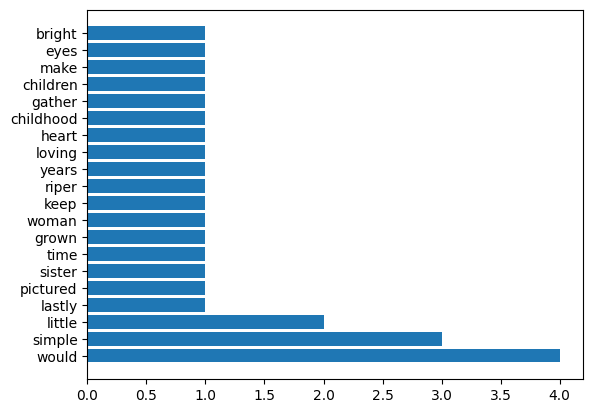

In [140]:
lemma = WordNetLemmatizer()
lem = []
def stopwordtrimmer(text):
    for sentence in text:
        filtered_list = [word for word in sentence if word.lower() not in sw]
        new_filtered_list = [word for word in filtered_list if word.isalnum()]
        string = ' '.join(new_filtered_list)
        lem.append(lemma.lemmatize(string))
    text_tokens = word_tokenize(string)
    fq = FreqDist(token.lower() for token in text_tokens)
    top_words = fq.most_common(20)
    words = [word[0] for word in top_words]
    frequencies = [word[1] for word in top_words]
    print(lem)
    plt.barh(words, frequencies)
    
stopwordtrimmer(aiw)

#I chose lemmatization for this because it feels more accurate
#in determining the roots of words. It also feels more intuitive
#than stemming.

In [113]:
analyzer = SentimentIntensityAnalyzer()

print(analyzer.polarity_scores(str(lem)))

{'neg': 0.113, 'neu': 0.745, 'pos': 0.142, 'compound': 0.9999}


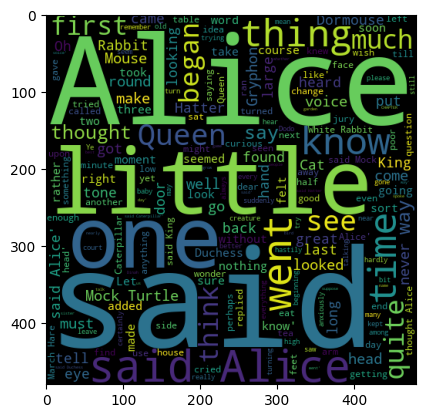

In [139]:
wordcloud = WordCloud(width=480, height=480).generate(str(lem))
plt.imshow(wordcloud)